In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN, KMeans

In [2]:
df = pd.read_csv('merged.csv', index_col=0)

In [3]:
df

name                team  year   mpg    fg%  3pfg%  \
0                LeBron James  Los Angeles Lakers  2020  34.6  0.493  0.348   
1               Anthony Davis  Los Angeles Lakers  2020  34.4  0.503  0.330   
2    Kentavious Caldwell-Pope  Los Angeles Lakers  2020  25.5  0.467  0.385   
3                  Kyle Kuzma  Los Angeles Lakers  2020  25.0  0.436  0.316   
4                 Danny Green  Los Angeles Lakers  2020  24.8  0.416  0.367   
..                        ...                 ...   ...   ...    ...    ...   
637                  Don Ford  Los Angeles Lakers  1980  11.2  0.508  0.000   
638              Marty Byrnes  Los Angeles Lakers  1980   6.1  0.500    NaN   
639                Ollie Mack  Los Angeles Lakers  1980   5.7  0.420  0.000   
640              Brad Holland  Los Angeles Lakers  1980   5.2  0.423  0.200   
641                 Butch Lee  Los Angeles Lakers  1980   2.8  0.308    NaN   

     rebounds  assists  steals  blocks  turnovers  points_per_game  \
0         7.8     10.2     1.2     0.5        3.9             25.3   
1         9.3      3.2     1.5     2.3        2.5             26.1   
2         2.1      1.6     0.8     0.2        0.9              9.3   
3         4.5      1.3     0.5     0.4        1.5             12.8   
4         3.3      1.3     1.3     0.5        0.9              8.0   
..        ...      ...     ...     ...        ...              ...   
637       1.9      0.7     0.2     0.3        0.6              3.0   
638       0.8      0.4     0.2     0.0        0.7              2.0   
639       0.8      0.7     0.1     0.0        0.3              1.9   
640       0.4      0.6     0.4     0.0        0.3              2.8   
641       0.7      0.8     0.1     0.0        0.6              1.3   

     player_efficiency position  
0                 25.5       PG  
1                 27.4       PF  
2                 11.0       SG  
3                 12.2       PF  
4                 10.8       SG  
..                 ...      ...  
637                8.3       SF  
638                6.3       SF  
639                9.1       SG  
640               14.3       SG  
641               12.4       PG  

[642 rows x 14 columns]

In [4]:
df.isnull().sum()

name                   0
team                   0
year                   0
mpg                    0
fg%                    2
3pfg%                118
rebounds               0
assists                0
steals                 0
blocks                 0
turnovers              0
points_per_game        0
player_efficiency      0
position               0
dtype: int64

In [5]:
df.fillna(0, inplace=True)
df.isnull().sum()

name                 0
team                 0
year                 0
mpg                  0
fg%                  0
3pfg%                0
rebounds             0
assists              0
steals               0
blocks               0
turnovers            0
points_per_game      0
player_efficiency    0
position             0
dtype: int64

In [6]:
features = df.drop(columns=['name', 'team', 'year', 'position'])

In [7]:
ss=StandardScaler()
X_sc = ss.fit_transform(features)

In [8]:
#instantiating and setting the model paramters:
dbscan = DBSCAN(eps=1.2, min_samples=4)

#fitting the model to our scaled data:
dbscan.fit(X_sc)

#creating a cluster column with the labels that our model was able to create:
features['cluster'] = dbscan.labels_

In [9]:
features.groupby('cluster').mean().T.drop(columns=-1)

cluster                    0          1        2       3       4
mpg                15.919079  37.173333  11.2750  30.625   3.800
fg%                 0.440274   0.478267   0.4725   0.501   0.000
3pfg%               0.213629   0.327133   1.0000   0.330   0.000
rebounds            2.462061   5.920000   2.9000   8.875   0.125
assists             1.390351   4.813333   0.6250   2.050   0.075
steals              0.502193   1.733333   0.2250   0.675   0.000
blocks              0.274561   0.640000   0.1750   1.225   0.000
turnovers           0.896272   2.600000   0.7750   1.525   0.275
points_per_game     5.755044  24.580000   3.1750  13.025   0.000
player_efficiency  11.316667  23.933333   9.4250  16.925 -10.325

In [10]:
features.cluster.value_counts()

 0    456
-1    159
 1     15
 4      4
 3      4
 2      4
Name: cluster, dtype: int64

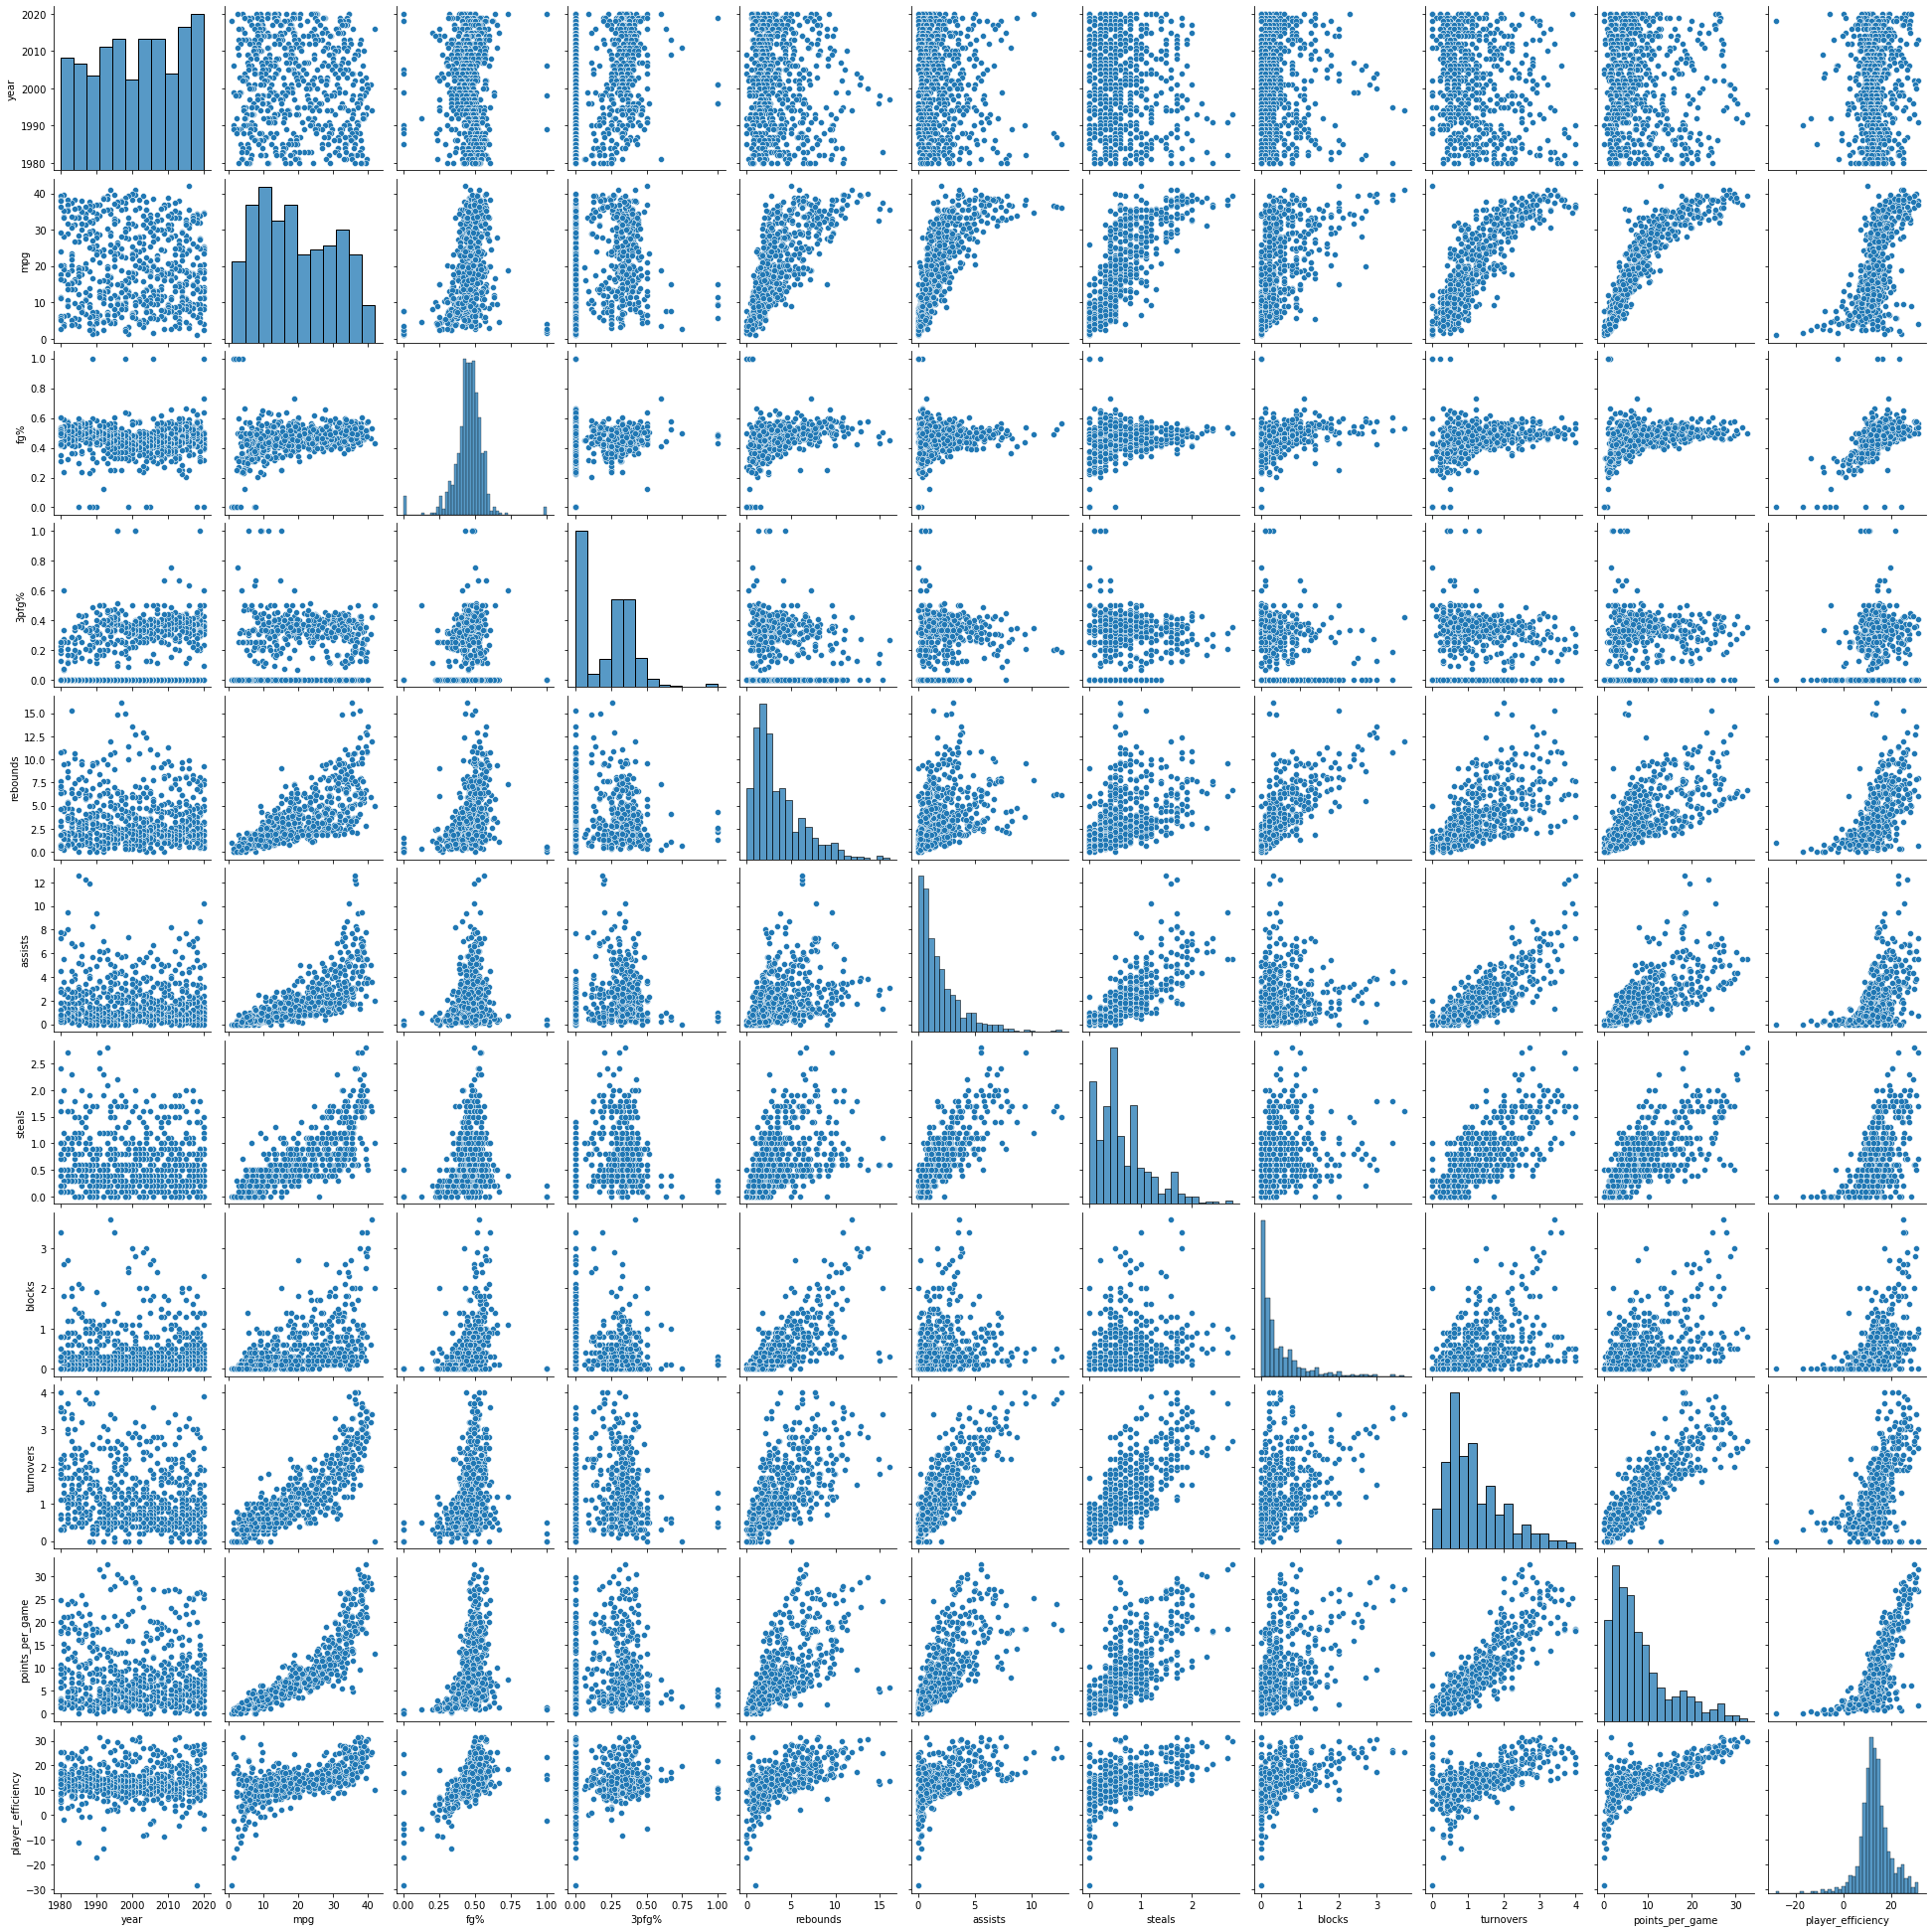

In [11]:
sns.pairplot(df)

In [12]:
X = features

#fit the data
sc = StandardScaler()
X_sc_2 = sc.fit_transform(X)

model = KMeans(n_clusters=5, random_state=42)
model.fit(X_sc_2)

# Get the labels and centroids for our first clustering model
km_labels = model.labels_
centroids = model.cluster_centers_

In [13]:
km_labels

array([3, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 2, 4, 2, 1, 2, 1, 2, 3, 3,
       0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 2, 4, 4, 1, 4, 2, 2, 1, 2, 2, 4, 0,
       3, 3, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4, 1, 1, 2, 4, 3, 0, 3, 4, 4, 1,
       4, 4, 4, 4, 1, 1, 1, 1, 2, 2, 0, 3, 3, 0, 4, 0, 4, 4, 4, 4, 1, 4,
       1, 2, 2, 4, 1, 2, 3, 3, 0, 4, 4, 0, 1, 1, 4, 4, 4, 1, 1, 2, 1, 3,
       0, 0, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 2, 2, 1, 1, 2, 3, 3, 0, 4,
       4, 4, 4, 1, 4, 4, 4, 1, 1, 2, 2, 2, 2, 1, 3, 0, 3, 4, 1, 4, 1, 4,
       4, 1, 2, 2, 1, 2, 2, 2, 0, 3, 4, 4, 0, 0, 4, 4, 1, 4, 4, 4, 4, 4,
       1, 2, 2, 4, 3, 0, 4, 0, 0, 4, 4, 4, 2, 2, 2, 2, 1, 0, 3, 4, 4, 0,
       4, 4, 4, 4, 4, 1, 1, 4, 2, 2, 2, 4, 3, 0, 3, 4, 0, 4, 4, 4, 1, 1,
       2, 2, 1, 2, 0, 3, 4, 3, 4, 4, 4, 1, 1, 4, 2, 4, 4, 2, 1, 2, 3, 4,
       1, 0, 4, 4, 4, 4, 0, 2, 2, 2, 1, 1, 4, 2, 1, 3, 0, 4, 3, 1, 4, 4,
       4, 1, 4, 1, 4, 1, 2, 2, 2, 2, 0, 3, 3, 4, 0, 0, 4, 1, 4, 4, 1, 4,
       1, 4, 2, 2, 2, 0, 3, 4, 4, 0, 4, 4, 4, 1, 4,

In [14]:
df_k = df.copy()
df_k['labels'] = km_labels
df_k.labels.value_counts()

4    213
1    141
2    131
0     85
3     72
Name: labels, dtype: int64

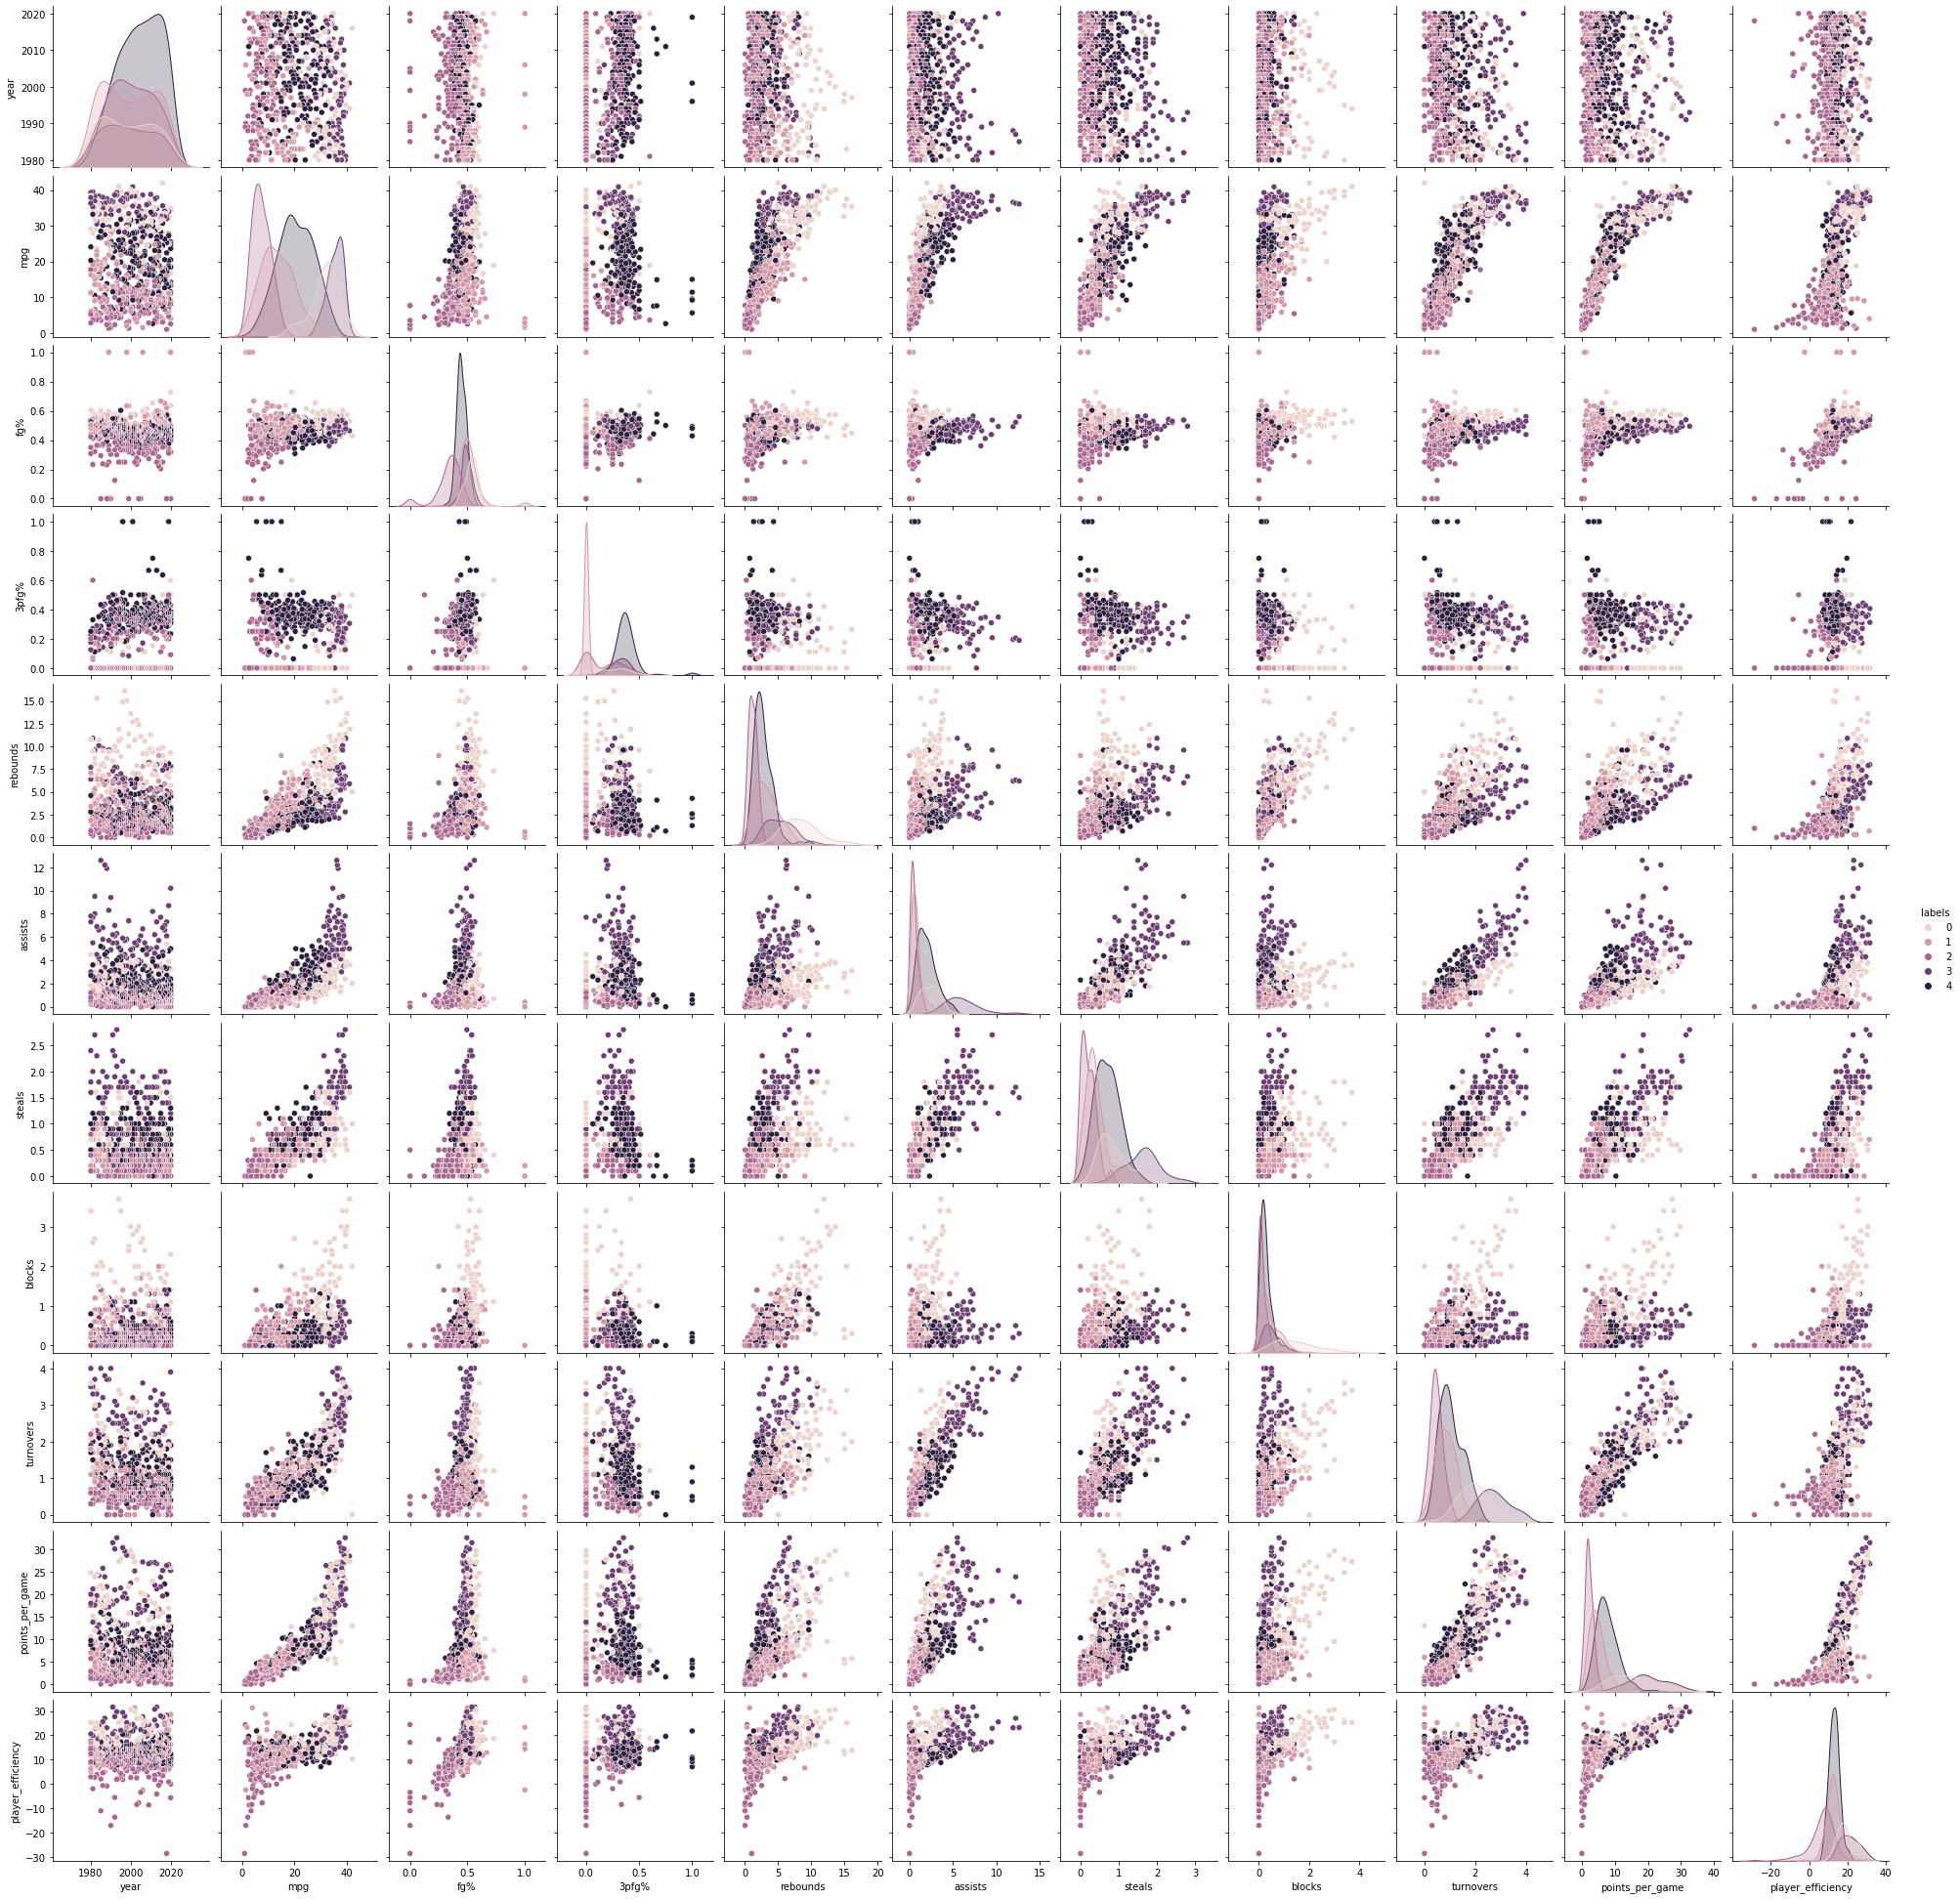

In [15]:
sns.pairplot(df_k, hue='labels')

In [16]:
print(df_k.labels.value_counts())
df_k.groupby('labels').mean().T

4    213
1    141
2    131
0     85
3     72
Name: labels, dtype: int64


labels                       0            1            2            3  \
year               1998.811765  1999.148936  2000.458015  1998.986111   
mpg                  31.500000    13.492199     7.378626    35.315278   
fg%                   0.531729     0.511397     0.332053     0.482347   
3pfg%                 0.149471     0.013816     0.155115     0.304625   
rebounds              8.421176     3.214894     1.187786     5.269444   
assists               2.331765     0.757447     0.506107     6.058333   
steals                0.850588     0.361702     0.207634     1.630556   
blocks                1.424706     0.429787     0.134351     0.497222   
turnovers             1.948235     0.837589     0.474046     2.733333   
points_per_game      15.376471     4.670922     2.148092    20.109722   
player_efficiency    19.356471    12.705674     6.330534    21.155556   

labels                       4  
year               2004.413146  
mpg                  20.520188  
fg%                   0.451338  
3pfg%                 0.380638  
rebounds              2.683568  
assists               1.994366  
steals                0.696244  
blocks                0.270423  
turnovers             1.053991  
points_per_game       7.598592  
player_efficiency    12.946479